## Importing necessary libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve,auc
from sklearn.calibration import calibration_curve
import import_ipynb
from DataPreProcessing import new_df,X,y,X_train, X_test, y_train,y_test,sc

# Training the Decision tree classifier model on training set

In [25]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state =0)
classifier.fit(X_train,y_train)

# criterion选择 entropy 是为了更关注信息增益，
# 适合处理类别不平衡的情况（数据里 "No Fraud" 很多，"Fraud" 很少）。

DecisionTreeClassifier(criterion='entropy', random_state=0)

# To Check if the model is overfitting or underfitting

In [27]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_test, y_test_pred)

In [28]:
train_accuracy = round(train_accuracy)
val_accuracy = round(val_accuracy)
print("Training Accuracy:", train_accuracy )
print("Validation Accuracy:",  val_accuracy)


Training Accuracy: 1
Validation Accuracy: 1


In [29]:
if train_accuracy > val_accuracy:
    print("The model may be overfitting.")
elif train_accuracy < val_accuracy:
    print("The model may be underfitting.")
else:
    print("The model's performance on training and validation sets are similar")


The model's performance on training and validation sets are similar


# Predicting a new result

In [30]:
classifier.predict(sc.transform([[1,9839.64, 170136.0,160296.36]]))

array([0], dtype=int64)

In [31]:
classifier.predict(sc.transform([[4,181,181,0]]))

array([1], dtype=int64)

# Prediciting the test set results

In [32]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1),y_test.reshape(len(y_test), 1)),1))  
# 第一列是预测，第二列是真实。

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Accuracy 

In [33]:
accuracy = accuracy_score(y_test,y_pred)
round(accuracy*100,2)
# 注意：数据不平衡（"No Fraud" 很多）时，
# 准确率高不一定说明模型好，所以还要看分类报告classification report。

99.97

## Classificiation Report

In [34]:
print(classification_report(y_test, y_pred))

'''
0- No Fraud
1- Fraud
'''

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588628
           1       0.88      0.88      0.88      2027

    accuracy                           1.00   1590655
   macro avg       0.94      0.94      0.94   1590655
weighted avg       1.00      1.00      1.00   1590655



'\n0- No Fraud\n1- Fraud\n'

## ROC Curve

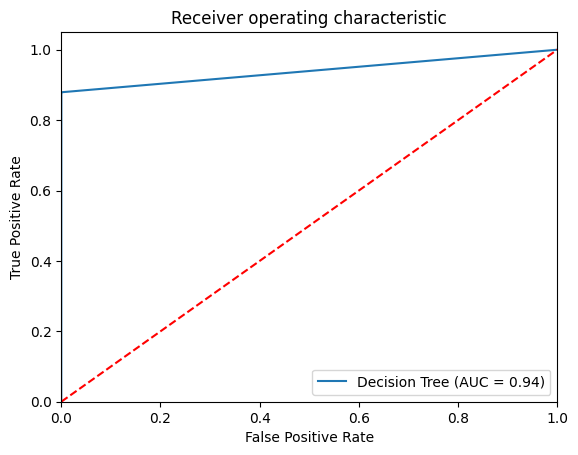

In [35]:
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (AUC = {:.2f})'.format(logit_roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## Precision-Recall Curve

AUC-PRC: 0.9999993861234756


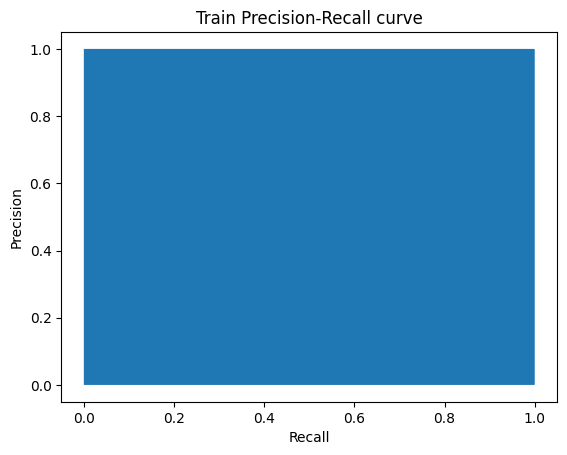

In [36]:
y_prob_train = classifier.predict_proba(X_train)[:,1]
y_prob_test = classifier.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_train, y_prob_train)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");
auc_prc = auc(recall, precision)
print("AUC-PRC:", auc_prc)

## Confusion Matrix

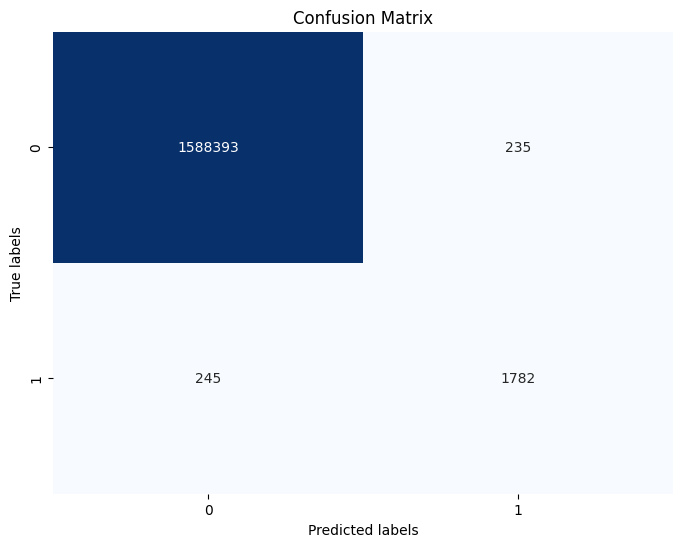

In [37]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Calibration Curve

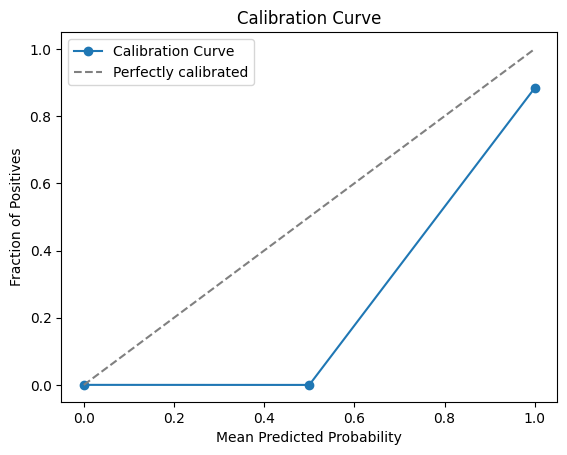

In [38]:
# Get predicted probabilities for the test set
probabilities = classifier.predict_proba(X_test)[:, 1]

# Calculate calibration curve
prob_true, prob_pred = calibration_curve(y_test, probabilities, n_bins=10)

# Plot calibration curve
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()
